# Emergence of Co-operation for Solar Communities

### Team Red Panda
- Fornt Mas, Jordi
- Kovvali, Sourya
- Nuñez-Jimenez, Alejandro
- Schwarz, Marius

In [1]:
# Makes plots inside the notebook
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

# Standard Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

# Importing the Agent and Model Classes
from Agent.BuildingAgent import BuildingAgent
from Model.BuildingModel import BuildingModel

# Import Visualization Functions
from Visualization.VisualizationFunctions import ColourMap
from Visualization.VisualizationFunctions import AnimateColourMap

Setting up some parameters for initialization

In [2]:
# Define number of agents
n_agents = 5

# Define number of time steps each model runs
n_steps = 10

# Name of csv file containing data on individual buildings
b_data_file = "Data/buildings_data.csv"
m_data_file = "Data/meta.json"

# Read building data from the CSV %%file
b_data = pd.read_csv(b_data_file, nrows=n_agents)

# Read meta data off JSON file
with open(m_data_file) as myjson:
    data_dict = json.loads(myjson.read())

Set up data arrays for visualization

In [3]:
#Example of arrays that will contain data wrto time and agent
profit_array = np.zeros([n_steps+1,n_agents])
idea_array = np.zeros([n_steps+1,n_agents])
utility_array = np.zeros([n_steps+1,n_agents])

Sample run for few steps

In [4]:
model = BuildingModel(BuildingAgent, b_data, n_agents, data_dict)

#Get initial data of interest
for i in range(0,n_agents):
    profit_array[0,i] = model.agent_list[i].profit
    idea_array[0,i] = float(model.agent_list[i].idea)
    utility_array[0,i] = model.agent_list[i].utility

for timestep in range(n_steps):
    model.step()
    
    #Get current data of interest
    for i in range(0,n_agents):
        profit_array[1+timestep,i] = model.agent_list[i].profit
        idea_array[1+timestep,i] = float(model.agent_list[i].idea)
        utility_array[1+timestep,i] = model.agent_list[i].utility

new_agent
680777
246316
0
new_agent
680535
246483
1
new_agent
680810
245817
2
new_agent
682011
247127
3
new_agent
682325
247535
4


TypeError: step() takes 1 positional argument but 2 were given

Results and graphs

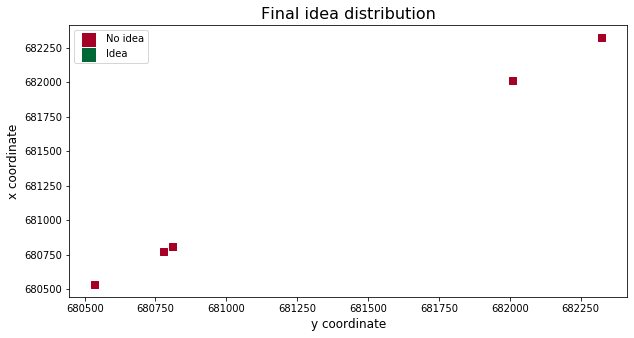

In [8]:
#Final Idea ColourMap
ColourMap(model.x_coord, model.y_coord, idea_array[n_steps], 
          col_range=(0,1), 
          x_label="x coordinate", 
          y_label="y coordinate", 
          colorbar=0, 
          Nlegend=2, 
          color_label=['No idea', 'Idea'], 
          title="Final idea distribution", 
          size=(10,5),
          cmap='RdYlGn',
          markersize=50,
          save=0,
          filename="Visualization/res/IdeaMap.svg")

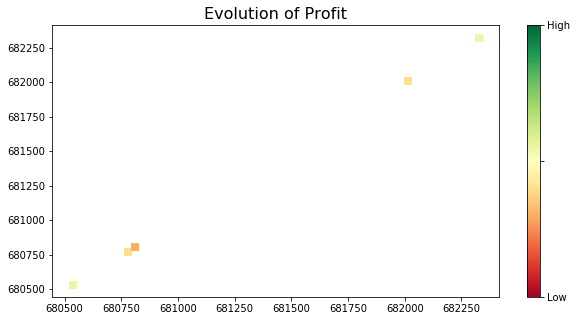

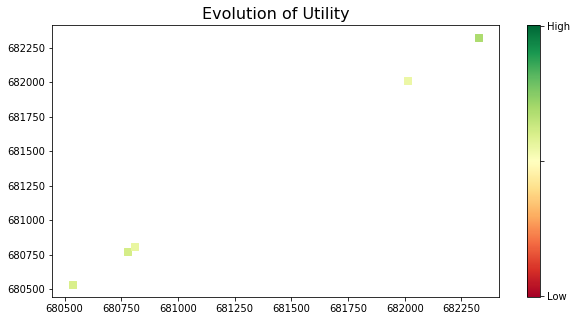

In [6]:
#Evolution of profit .gif

AnimateColourMap(n_steps, model.x_coord, model.y_coord, profit_array, 
                 dlyfactor=3, 
                 col_range=(0,2), 
                 x_label="", 
                 y_label="", 
                 colorbar=1, 
                 Nlegend=3, 
                 color_label=['Low', '', 'High'], 
                 title="Evolution of Profit", 
                 size=(10,5),
                 cmap='RdYlGn',
                 markersize=50,
                 filename="Visualization/res/ProfitEvolution.gif")

AnimateColourMap(n_steps, model.x_coord, model.y_coord, utility_array, 
                 dlyfactor=3, 
                 col_range=(0.6,0.9), 
                 x_label="", 
                 y_label="", 
                 colorbar=1, 
                 Nlegend=3, 
                 color_label=['Low', '', 'High'], 
                 title="Evolution of Utility", 
                 size=(10,5),
                 cmap='RdYlGn',
                 markersize=50,
                 filename="Visualization/res/Utility.gif")        